# <center>        **Introduction to Data Science (S1-22_DSECLZG523)-ASSIGNMENT**</center>

## Group No 160

## Group Member Names:
1. Akanksha Alok Srivastava
2. Durgamadhav Behra
3. Manu M
4. Reenu Rose James

# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

--------------Type the answers below this line-------------- 

This dataset contains information of the Loan Disbursement details granted to the aaplicant. Based on the Annual Income, Co-applicants income, Credit-History and the term for which the loan is required, the model will predict if the Loan can be sanctioned to the applicant or not. The data was collected from the Bank of America in United States. The goal of this little project is to predict if the Loan will be sanctioned to the applicant based on the Training data set.

<b>1. What is the business problem that you are trying to solve?</b></br>
A: Based on the training data set, we are trying to build a ML model, which will help in predicting the Status of the Loan Sanctions to the applicant on the provided test data.
   
<b>2. What data do you need to answer the above problem?</b></br>
A: To build a machine learning model that predicts the status of loan sanctions, you will need both historical data on loan applications and their outcomes, as well as data on the applicants who are applying for loans. Some of the data you may need include:</br>
<b>Applicant information:</b> This may include the applicant's age, gender, income, employment status, education level, and other demographic information.</br>
<b>Loan information:</b> This may include the loan amount, loan type, loan duration, interest rate, and any collateral provided.</br>
<b>Credit history:</b> This may include the applicant's credit score, credit history, outstanding debts, and payment history.</br>
<b>Employment history:</b> This may include the applicant's current and previous employment status, job title, and length of employment.
<b>Loan outcome data:</b> This includes data on whether the loan was approved, rejected, or under review.
Once you have gathered the necessary data, you can use machine learning algorithms to analyze the data and predict the status of loan sanctions for new loan applications. It's important to note that the quality and relevance of the data will significantly impact the accuracy of the model's predictions, so it's essential to ensure that the data is clean, accurate, and representative of the population of loan applicants.

<b>3. What are the different sources of data?    </b><br>
A : Some of the potential data sources are :<br>
<b>Loan application forms:</b> This is the primary source of data and contains information such as applicant details, loan amount, loan duration, and purpose.<br>
<b>Credit bureaus:</b> Credit bureaus provide information on an applicant's credit score, credit history, outstanding debts, and payment history.<br>
<b>Banks and financial institutions:</b> Banks and financial institutions maintain data on loans disbursed, interest rates, and repayment schedules.


<b>4. What kind of analytics task are you performing?</b><br>
A : In this task, the machine learning algorithm is trained on a training dataset (i.e., historical loan application data) to learn the patterns and relationships between the input features (e.g., applicant details, loan amount, loan duration, credit score, etc.) and the output label (i.e., loan status). Once the model is trained, it can be used to predict the loan status of new loan applications.<br>
The classification task is a type of supervised learning that involves predicting a categorical label or class based on the input features. In this case, the loan status can be categorized into two classes, such as approved (Yes) or rejected (No).
<br>
The performance of the classification model can be evaluated using metrics such as accuracy, precision, recall, F1 score. The goal is to develop a model that can accurately predict the loan status of new loan applications with high precision and recall while avoiding overfitting to the training data.

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [1]:
import urllib.request 

url_test = 'https://raw.githubusercontent.com/srivastavaakanksha995/Loan-Prediction/main/TEST.csv'
url_train = 'https://raw.githubusercontent.com/srivastavaakanksha995/Loan-Prediction/main/TRAIN.csv'

filename_test = "LOAN_TEST.csv" 
filename_train = "LOAN_TRAIN.csv"

urllib.request.urlretrieve(url_test, filename_test) 
urllib.request.urlretrieve(url_train, filename_train) 


print("Download complete.")

Download complete.


## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [3]:
# Reading the file

df_train = pd.read_csv("LOAN_TRAIN.csv")
df_test = pd.read_csv("LOAN_TEST.csv")

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [4]:
print("====================================================================================================")
print(" Training Data Information")
print("")
print(df_train.head(5))
print(df_train.tail(5))
print("====================================================================================================")
print(" Test Data Information")
print("")
print(df_test.head(5))
print(df_train.head(5))

 Training Data Information

   Loan_ID Gender Marital Status Dependents     Education  Occupation  \
0     1002   Male             No          0      Graduate  Unemployed   
1     1003   Male            Yes          1      Graduate  Unemployed   
2     1005   Male            Yes          0      Graduate    Employed   
3     1006   Male            Yes          0  Not Graduate  Unemployed   
4     1008   Male             No          0      Graduate  Unemployed   

   Applican tIncome  Coapplicant Income  Loan Amount  Tenure (in Years)  \
0              5849                 0.0          NaN                 30   
1              4583              1508.0        128.0                 30   
2              3000                 0.0         66.0                 30   
3              2583              2358.0        120.0                 30   
4              6000                 0.0        141.0                 30   

   Credit History  Ongoing Loan Region Approval Status  
0              1.0       

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [5]:
print(df_train.shape, df_test.shape)

(614, 14) (367, 13)


In [6]:
# Display column headings

print("\n Training Dataset - Column headings:")
print(list(df_train.columns))


print("\n Test Dataset - Column headings:")
print(list(df_test.columns))


 Training Dataset - Column headings:
['Loan_ID', 'Gender', 'Marital Status', 'Dependents', 'Education', 'Occupation', 'Applican tIncome', 'Coapplicant Income', 'Loan Amount', 'Tenure (in Years)', 'Credit History ', 'Ongoing Loan', 'Region', 'Approval Status']

 Test Dataset - Column headings:
['Loan_ID', 'Gender', 'Marital Status', 'Dependents', 'Education', 'Occupation', 'Applican tIncome', 'Coapplicant Income', 'Loan Amount', 'Tenure (in Years)', 'Credit History ', 'Ongoing Loan', 'Region']


In [7]:
# Display statistical information

print("\n Training Dataset - Statistical information:")
print(df_train.describe())



print("\n Testing Dataset - Statistical information:")
print(df_train.describe())


 Training Dataset - Statistical information:
           Loan_ID  Applican tIncome  Coapplicant Income  Loan Amount  \
count   614.000000        614.000000          614.000000   592.000000   
mean   1999.785016       5403.459283         1621.245798   146.412162   
std     567.097644       6109.041673         2926.248369    85.587325   
min    1002.000000        150.000000            0.000000     9.000000   
25%    1532.750000       2877.500000            0.000000   100.000000   
50%    1993.500000       3812.500000         1188.500000   128.000000   
75%    2476.750000       5795.000000         2297.250000   168.000000   
max    2990.000000      81000.000000        41667.000000   700.000000   

       Tenure (in Years)  Credit History   
count         614.000000       564.000000  
mean           27.850163         0.842199  
std             6.848657         0.364878  
min             0.000000         0.000000  
25%            30.000000         1.000000  
50%            30.000000        

In [8]:
# Display description

print("\nTrain Dataset - Description:")
print(df_train.info())


print("\nTest Dataset - Description:")
print(df_test.info())


Train Dataset - Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    int64  
 1   Gender              601 non-null    object 
 2   Marital Status      611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Occupation          582 non-null    object 
 6   Applican tIncome    614 non-null    int64  
 7   Coapplicant Income  614 non-null    float64
 8   Loan Amount         592 non-null    float64
 9   Tenure (in Years)   614 non-null    int64  
 10  Credit History      564 non-null    float64
 11  Ongoing Loan        614 non-null    object 
 12  Region              614 non-null    object 
 13  Approval Status     614 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 67.3+ KB
None

Test Dataset

In [9]:
# Display statistical summary in details

print("\n Training Dataset - Statistical summary:")
print(df_train.describe(include='all'))


print("\n Testing Dataset - Statistical summary:")
print(df_test.describe(include='all'))



 Training Dataset - Statistical summary:
            Loan_ID Gender Marital Status Dependents Education  Occupation  \
count    614.000000    601            611        599       614         582   
unique          NaN      2              2          4         2           2   
top             NaN   Male            Yes          0  Graduate  Unemployed   
freq            NaN    489            398        345       480         500   
mean    1999.785016    NaN            NaN        NaN       NaN         NaN   
std      567.097644    NaN            NaN        NaN       NaN         NaN   
min     1002.000000    NaN            NaN        NaN       NaN         NaN   
25%     1532.750000    NaN            NaN        NaN       NaN         NaN   
50%     1993.500000    NaN            NaN        NaN       NaN         NaN   
75%     2476.750000    NaN            NaN        NaN       NaN         NaN   
max     2990.000000    NaN            NaN        NaN       NaN         NaN   

        Applican tInc

<b> Gender Variable </b>

In [10]:
df_train.Gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

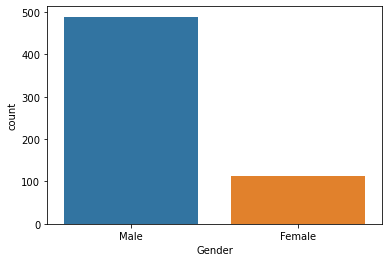

In [11]:
sns.countplot(x="Gender", data = df_train)
plt.show()

In [12]:
count_male = len(df_train[df_train.Gender == 'Male'])
count_female = len(df_train[df_train.Gender == 'Female'])
count_null = len(df_train[df_train.Gender.isnull()])

print("Percentage of Male applicant:",(count_male / (len(df_train.Gender))*100),"%")
print("Percentage of Female applicant: ",(count_female / (len(df_train.Gender))*100),"%")
print("Missing values percentage:%",(count_null / (len(df_train.Gender))*100), "%")

Percentage of Male applicant: 79.64169381107492 %
Percentage of Female applicant:  18.241042345276874 %
Missing values percentage:% 2.1172638436482085 %


We can observe that the number of male applicants is higher compared to female applicants. Also there are missing values in this column

<b> Marital Status </b>

In [13]:
df_train['Marital Status'].value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Marital Status, dtype: int64

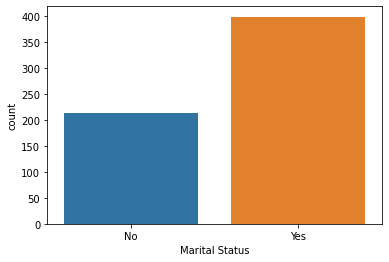

In [14]:
sns.countplot(x = "Marital Status", data = df_train)
plt.show()

In [15]:
count_married = len(df_train[df_train['Marital Status'] == 'Yes'])
count_non_married = len(df_train[df_train['Marital Status'] == 'No'])
count_null = len(df_train[df_train['Marital Status'].isnull()])

print("Percentage of married:",(count_married / (len(df_train['Marital Status']))*100),"%")
print("Percentage of Non married applicant:",(count_non_married / (len(df_train['Marital Status']))*100),"%")
print("Missing values percentage:",(count_null / (len(df_train['Marital Status']))*100),"%")


Percentage of married: 64.82084690553745 %
Percentage of Non married applicant: 34.69055374592834 %
Missing values percentage: 0.4885993485342019 %


Number of applicants that has been married is quite high as compared to applicants that hasn't married. Also there are small number of missing values in this column as well.

<b> Education </b>

In [16]:
df_train.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

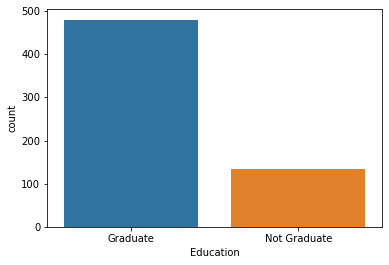

In [17]:
sns.countplot(x = "Education", data = df_train)
plt.show()

In [18]:
count_graduate = len(df_train[df_train.Education == 'Graduate'])
count_not_graduate = len(df_train[df_train.Education == 'Not Graduate'])
count_null = len(df_train[df_train.Education.isnull()])

print("Percentage of graduate applicant:",(count_graduate / (len(df_train.Education))*100), "%")
print("Percentage of Not graduate applicant:",(count_not_graduate / (len(df_train.Education))*100), "%")
print("Missing values percentage:",(count_null / (len(df_train.Education))*100),"%")

Percentage of graduate applicant: 78.17589576547232 %
Percentage of Not graduate applicant: 21.824104234527688 %
Missing values percentage: 0.0 %


The number of applicants that has been graduated is higher as compared to applicants that hasn't graduated. Also, there are no missing values in this column

<b> Occupation </b>

In [19]:
df_train.Occupation.value_counts(dropna=False)

Unemployed    500
Employed       82
NaN            32
Name: Occupation, dtype: int64

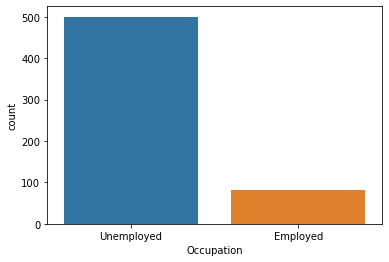

In [20]:
sns.countplot(x = "Occupation", data = df_train)
plt.show()

In [21]:
count_unemployed = len(df_train[df_train.Occupation == 'Unemployed'])
count_employed = len(df_train[df_train.Occupation == 'Employed'])
count_null = len(df_train[df_train.Occupation.isnull()])

print("Percentage of Unemployed:",(count_unemployed / (len(df_train.Occupation))*100),"%")
print("Percentage of Employed : ",(count_employed / (len(df_train.Occupation))*100),"%")
print("Missing values percentage: ",(count_null / (len(df_train.Occupation))*100),"%")

Percentage of Unemployed: 81.43322475570032 %
Percentage of Employed :  13.355048859934854 %
Missing values percentage:  5.211726384364821 %


The number of applicants that are not Unemployed are higher as compared to applicants that are Employed. It also can be seen, there are missing values in this column.

<b> Credit History </b>

In [22]:
df_train['Credit History '].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit History , dtype: int64

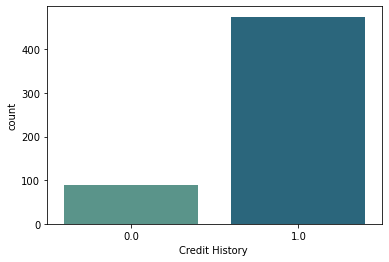

In [23]:
sns.countplot(x = "Credit History ", data = df_train, palette = "crest")
plt.show()

In [24]:
count_1 = len(df_train[df_train['Credit History '] == 1])
count_0 = len(df_train[df_train['Credit History '] == 0])
count_null = len(df_train[df_train['Credit History '].isnull()])

print("Percentage of Any credit history:", (count_1 / (len(df_train['Credit History ']))*100),"%")
print("Percentage of No credit history:",(count_0 / (len(df_train['Credit History ']))*100),"%")
print("Missing values percentage: ",(count_null / (len(df_train['Credit History ']))*100),"%")

Percentage of Any credit history: 77.36156351791531 %
Percentage of No credit history: 14.495114006514658 %
Missing values percentage:  8.143322475570033 %


The number of applicants that have good credit history is higher as compared to applicants that have bad credit history. There are missing values in this column.


<b> Ongoing Loan </b>

In [25]:
df_train['Ongoing Loan'].value_counts(dropna=False)

Yes    422
No     192
Name: Ongoing Loan, dtype: int64

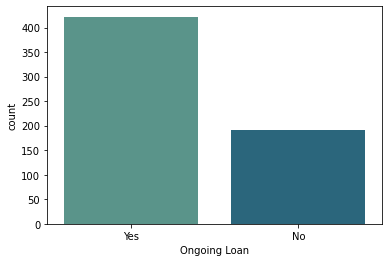

In [26]:
sns.countplot(x = "Ongoing Loan", data = df_train, palette = "crest")
plt.show()

In [27]:
count_Yes = len(df_train[df_train['Ongoing Loan'] == "Yes"])
count_No = len(df_train[df_train['Ongoing Loan'] == "No"])
count_null = len(df_train[df_train['Ongoing Loan'].isnull()])

print("Percentage of people having Ongoing Loan:", (count_Yes / (len(df_train['Ongoing Loan']))*100),"%")
print("Percentage of people not having Ongoing Loan:",(count_No / (len(df_train['Ongoing Loan']))*100),"%")
print("Missing values percentage: ",(count_null / (len(df_train['Ongoing Loan']))*100),"%")

Percentage of people having Ongoing Loan: 68.72964169381108 %
Percentage of people not having Ongoing Loan: 31.27035830618892 %
Missing values percentage:  0.0 %


The number of applicants already having an Ongoing Loan is higher as compared to applicants not having an Ongoing Loan. There are no missing values.

<b> Area </b>

In [28]:
df_train.Region.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Region, dtype: int64

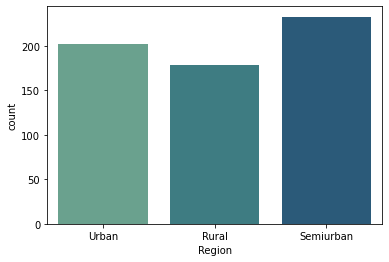

In [29]:
sns.countplot(x = "Region", data = df_train, palette="crest")
plt.show()

In [30]:
count_urban = len(df_train[df_train.Region == 'Urban'])
count_rural = len(df_train[df_train.Region == 'Rural'])
count_semi_urban = len(df_train[df_train.Region == 'Semiurban'])
count_null = len(df_train[df_train.Region.isnull()])

print("Percentage of Urban:",(count_urban / (len(df_train.Region))*100),"%")
print("Percentage of Rural:",(count_rural / (len(df_train.Region))*100),"%")
print("Percentage of Semiurban:",(count_semi_urban / (len(df_train.Region))*100),"%")
print("Missing values percentage:",(count_null / (len(df_train.Region))*100),"%")

Percentage of Urban: 32.89902280130293 %
Percentage of Rural: 29.153094462540718 %
Percentage of Semiurban: 37.94788273615635 %
Missing values percentage: 0.0 %


This column has a balanced distribution between Urban, Rural, and Semiurban property area. No missing values are present in this column

<b> Tenure (in Years) </b>

In [31]:
df_train['Tenure (in Years)'].value_counts(dropna=False)

30    512
15     44
40     15
0      14
25     13
20      4
7       4
10      3
5       2
3       2
1       1
Name: Tenure (in Years), dtype: int64

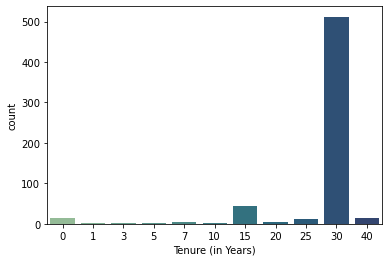

In [32]:
sns.countplot(x = "Tenure (in Years)", data = df_train, palette = "crest")
plt.show()

In [33]:
count_urban = len(df_train[df_train.Region == 'Urban'])
count_rural = len(df_train[df_train.Region == 'Rural'])
count_semi_urban = len(df_train[df_train.Region == 'Semiurban'])
count_null = len(df_train[df_train.Region.isnull()])

print("Percentage of Urban:",(count_urban / (len(df_train.Region))*100),"%")
print("Percentage of Rural:",(count_rural / (len(df_train.Region))*100),"%")
print("Percentage of Semiurban:",(count_semi_urban / (len(df_train.Region))*100),"%")
print("Missing values percentage:",(count_null / (len(df_train.Region))*100),"%")

Percentage of Urban: 32.89902280130293 %
Percentage of Rural: 29.153094462540718 %
Percentage of Semiurban: 37.94788273615635 %
Missing values percentage: 0.0 %


As can be seen from the results, the 30 years loan duration is the most popular compared to others.

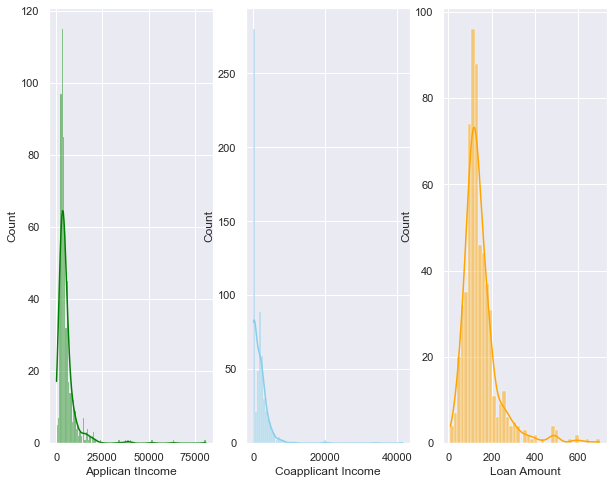

In [34]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = df_train, x = "Applican tIncome", kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = df_train, x = "Coapplicant Income", kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = df_train, x = "Loan Amount", kde = True, color = 'orange');

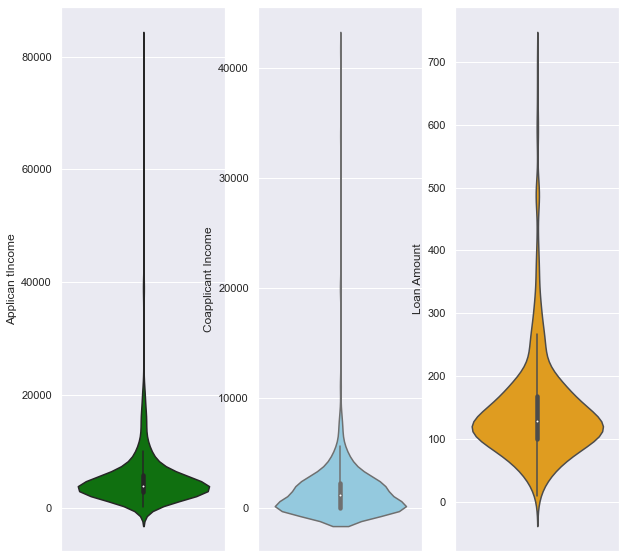

In [35]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(1, 3, figsize=(10, 10))
plt.subplot(1,3,1)
sns.violinplot(data = df_train, y = "Applican tIncome", color = 'green')
plt.subplot(1,3,2)
sns.violinplot(data = df_train, y = "Coapplicant Income", color='skyblue')
plt.subplot(1,3,3)
sns.violinplot(data = df_train, y = "Loan Amount", color='orange');

The distribution of Applicant_income, Co_Applicant Income, and Loan_Amount are positively skewed and contains outliers.

The distribution of Loan_Amount Term is negativly skewed and contain outliers as well.

<AxesSubplot:>

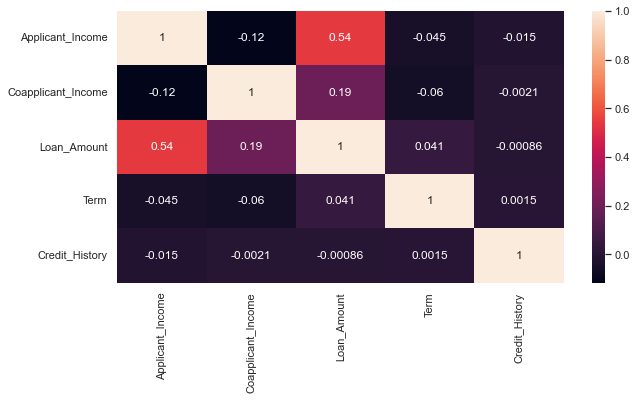

In [37]:
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot = True)

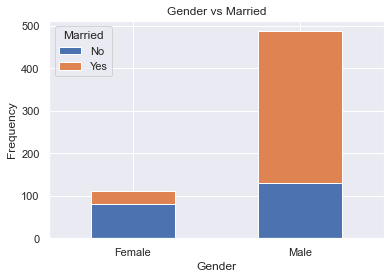

In [38]:
pd.crosstab(train.Gender, train.Married).plot(kind = "bar", stacked = True)
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

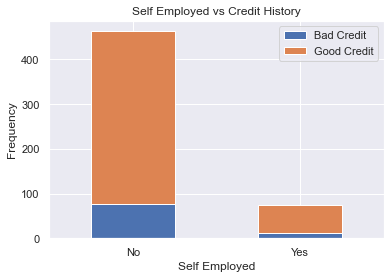

In [39]:
pd.crosstab(train.Self_Employed, train.Credit_History).plot(kind = "bar", stacked = True)
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation = 0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.


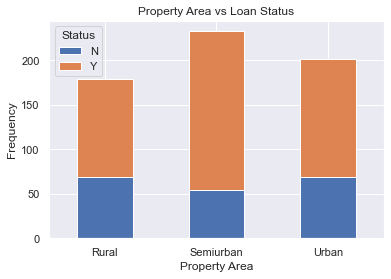

In [41]:
pd.crosstab(train.Area, train.Status).plot(kind = "bar", stacked = True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most of loans that got accepted has property in Semiurban compared to Urban and Rural

<b> Null Values </b>

In [46]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [47]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Term'].fillna(train['Term'].mode()[0],inplace = True)

In [48]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Term'].fillna(test['Term'].mode()[0],inplace = True)

In [49]:
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [50]:
train['Loan_Amount'].fillna(train['Loan_Amount'].mean(),inplace = True)

In [51]:
test['Loan_Amount'].fillna(test['Loan_Amount'].mean(),inplace = True)

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

<b> Answers:- </b>


1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [ ]:
##---------Type the code below this line------------------##

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [ ]:
##---------Type the code below this line------------------##

## 3.3 Encode categorical data

In [ ]:
##---------Type the code below this line------------------##

## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [ ]:
##---------Type the code below this line------------------##

In [ ]:
##---------Type the code below this line------------------##

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

In [ ]:
##---------Type the code below this line------------------##

In [ ]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [ ]:
##---------Type the code below this line------------------##

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

In [ ]:
##---------Type the code below this line------------------##

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [ ]:
##---------Type the code below this line------------------##

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

In [ ]:
##---------Type the code below this line------------------##

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [ ]:
##---------Type the code below this line------------------##

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [53]:
train = pd.get_dummies(train)

# Drop columns
train = train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
train.rename(columns = new, inplace = True)

In [54]:
x = train.drop(["Status_Y"], axis = 1)
y = train["Status_Y"]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [56]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)
test = minmax.transform(test)

ValueError: could not convert string to float: 'Male'

## 6.2 ML technique 2 + Justification

In [ ]:
##---------Type the code below this line------------------##

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [ ]:
##---------Type the code below this line------------------##

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!